In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt # библиотека визуализации
import seaborn as sns
# sns.set_style('whitegrid')
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(10, 8)})


import warnings
warnings.filterwarnings('ignore')


from IPython.core.display import HTML
HTML("""
<style>
.p-Widget.jp-OutputPrompt.jp-OutputArea-prompt:empty {
  padding: 0;
  border: 0;
}
</style>
""")

In [77]:
df = pd.read_csv('data/ab_data.zip')

In [78]:
df

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1
...,...,...,...,...
290477,751197,2017-01-03,A,0
290478,945152,2017-01-12,A,0
290479,734608,2017-01-22,A,0
290480,697314,2017-01-15,A,0


user_id	- идентификатор пользователя, зашедшего на сайт

timestamp - дата события

group - группа теста (контрольная или тестовая)

converted - совершил пользователь целевое действие (нажатие кнопки «добавить в корзину» на сопутствующем товаре) или нет. 1 — да, 0 — нет.

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    290482 non-null  int64 
 1   timestamp  290482 non-null  object
 2   group      290482 non-null  object
 3   converted  290482 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ MB


In [80]:
# Конвертирую datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [81]:
# Тут object конвертируется в string
df = df.convert_dtypes()

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    290482 non-null  Int64         
 1   timestamp  290482 non-null  datetime64[ns]
 2   group      290482 non-null  string        
 3   converted  290482 non-null  Int64         
dtypes: Int64(2), datetime64[ns](1), string(1)
memory usage: 9.4 MB


In [83]:
a_df = df[df['group'] == 'A']
a_df

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
4,864975,2017-01-21,A,1
5,936923,2017-01-10,A,0
7,719014,2017-01-17,A,0
...,...,...,...,...
290475,718310,2017-01-21,A,0
290477,751197,2017-01-03,A,0
290478,945152,2017-01-12,A,0
290479,734608,2017-01-22,A,0


In [84]:
b_df = df[df['group'] == 'B']
b_df

,user_id,timestamp,group,converted
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
6,679687,2017-01-19,B,1
8,817355,2017-01-04,B,1
9,839785,2017-01-15,B,1
...,...,...,...,...
290466,677163,2017-01-03,B,0
290469,925675,2017-01-07,B,0
290472,643562,2017-01-02,B,0
290476,822004,2017-01-04,B,0


Группы разделены абсолютно равномерно. В A и B одинакове количество пользователей, 145241.

Группирую данные по дням и группам A и B. В группах считаю общее количество пользователей через count. 

И количество совершивших действие по добавлению дополнительного товара в корзину.

In [85]:
daily_df = df.groupby(['timestamp', 'group']).agg({'user_id': 'count', 'converted': 'sum'})
daily_df

user_id  converted
timestamp  group                    
2017-01-02 A         2851        357
           B         2848        339
2017-01-03 A         6584        749
           B         6620        754
2017-01-04 A         6573        797
           B         6538        763
2017-01-05 A         6419        791
           B         6509        743
2017-01-06 A         6604        762
           B         6735        834
2017-01-07 A         6595        793
           B         6604        765
2017-01-08 A         6692        793
           B         6702        810
2017-01-09 A         6624        792
           B         6619        783
2017-01-10 A         6657        752
           B         6690        844
2017-01-11 A         6686        790
           B         6672        772
2017-01-12 A         6508        794
           B         6631        815
2017-01-13 A         6562        769
           B         6510        730
2017-01-14 A         6555        830
           B         6607        791
2017-01-15 A         6710        814
           B         6556        743
2017-01-16 A         6604        801
           B         6526        779
2017-01-17 A         6606        816
           B         6527        828
2017-01-18 A         6484        807
           B         6602        814
2017-01-19 A         6562        787
           B         6555        758
2017-01-20 A         6536        752
           B         6690        786
2017-01-21 A         6765        851
           B         6544        757
2017-01-22 A         6587        782
           B         6649        782
2017-01-23 A         6717        847
           B         6627        802
2017-01-24 A         3760        441
           B         3680        446

In [86]:
# Сбрасываю индексы в отдельные столбцы что бы избежать вложенности и упростить таблицу
daily_df.reset_index(inplace=True)

In [87]:
# Перименую столбец, что бы он соответствовал сути
daily_df.rename(columns={'user_id': 'users_count'}, inplace=True)

Для завершения этапа подготовки данных к анализу нам осталось рассчитать конверсию на каждый день проведения A/B-тестирования.

In [88]:
daily_df['conversion'] = daily_df['converted'] / daily_df['users_count'] * 100
daily_df

,timestamp,group,users_count,converted,conversion
0,2017-01-02,A,2851,357,12.521922
1,2017-01-02,B,2848,339,11.90309
2,2017-01-03,A,6584,749,11.376063
3,2017-01-03,B,6620,754,11.389728
4,2017-01-04,A,6573,797,12.125361
5,2017-01-04,B,6538,763,11.670236
6,2017-01-05,A,6419,791,12.322792
7,2017-01-05,B,6509,743,11.414964
8,2017-01-06,A,6604,762,11.538462
9,2017-01-06,B,6735,834,12.383073


Чему была равна конверсия (в процентах) в группе А 5 января 2017 года? Ответ округлите до второго знака после запятой.

In [89]:
check_day = pd.to_datetime('2017-01-05')
mask = (daily_df['group'] == 'A') & (daily_df['timestamp'] == check_day)

In [90]:
check = daily_df[mask]
round(check['conversion'].values[0], 2)

12.32

ВИЗУАЛЬНЫЙ АНАЛИЗ КОНВЕРСИИ В ГРУППАХ

In [91]:
from IPython.core.display import HTML
HTML("""
<style>
.p-Widget.jp-OutputPrompt.jp-OutputArea-prompt:empty {
  padding: 0;
  border: 0;
}
</style>
""")

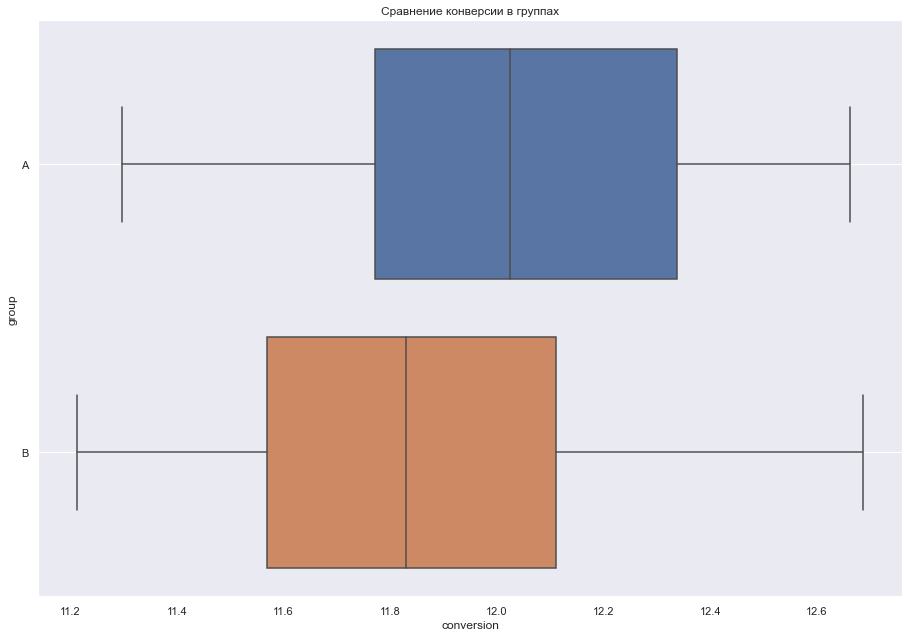

In [92]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(12, 8)) 
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1]) 
# строим boxplot для conversion по признаку group
sns.boxplot(data=daily_df, x='conversion', y='group', ax=ax) 
# задаём подпись к графику
ax.set_title('Сравнение конверсии в группах')
# задаём отображение сетки
ax.grid();
sns.set_style('whitegrid')

Давайте вычислим средний и медианный показатель конверсии в контрольной и тестовой группе и умножим результат на 100 (получим результат в процентах)

In [93]:
conversion_piv = daily_df.groupby('group')['conversion'].agg(['mean', 'median'])
conversion_piv

,mean,median
group,,
A,12.032876,12.024261
B,11.872697,11.829582


In [94]:
daily_df

,timestamp,group,users_count,converted,conversion
0,2017-01-02,A,2851,357,12.521922
1,2017-01-02,B,2848,339,11.90309
2,2017-01-03,A,6584,749,11.376063
3,2017-01-03,B,6620,754,11.389728
4,2017-01-04,A,6573,797,12.125361
5,2017-01-04,B,6538,763,11.670236
6,2017-01-05,A,6419,791,12.322792
7,2017-01-05,B,6509,743,11.414964
8,2017-01-06,A,6604,762,11.538462
9,2017-01-06,B,6735,834,12.383073


Но для начала ради эксперимента посмотрим, как вообще изменялись показатели ежедневной конверсии в каждой группе во времени. Для этого построим линейные графики для каждой группы: по оси абсцисс отложим дату, а по оси ординат — показатель конверсии

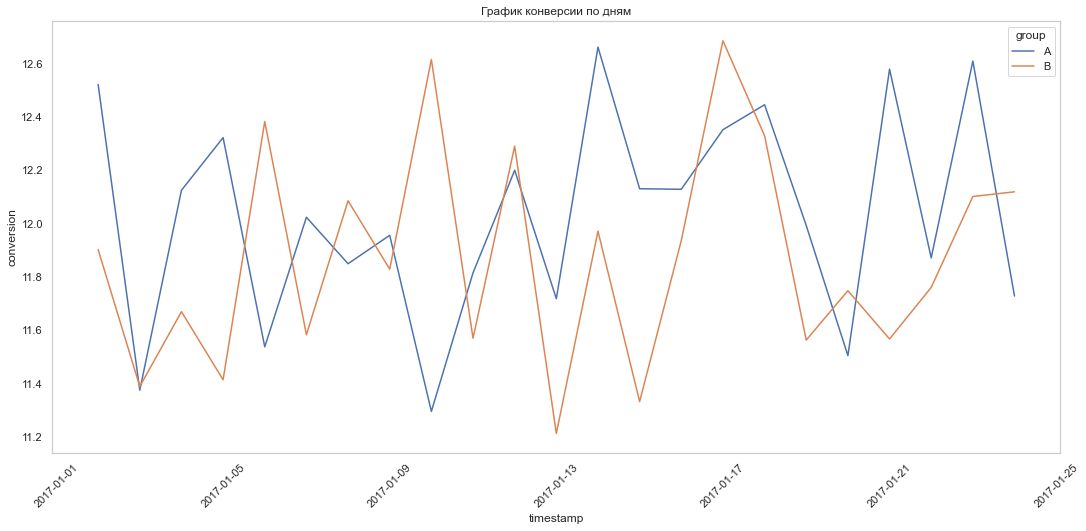

In [95]:
# создаём фигуру размером
fig = plt.figure(figsize=(14, 6))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для конверсии во времени в каждой группе
sns.lineplot(
    data=daily_df,
    x='timestamp',
    y='conversion',
    hue='group', 
    ax=ax
)
# задаём подпись к графику
ax.set_title('График конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation=45)
# задаём отображение сетки
ax.grid();

In [96]:
daily_a_df = daily_df[daily_df['group'] == 'A']
daily_a_df

,timestamp,group,users_count,converted,conversion
0,2017-01-02,A,2851,357,12.521922
2,2017-01-03,A,6584,749,11.376063
4,2017-01-04,A,6573,797,12.125361
6,2017-01-05,A,6419,791,12.322792
8,2017-01-06,A,6604,762,11.538462
10,2017-01-07,A,6595,793,12.024261
12,2017-01-08,A,6692,793,11.84997
14,2017-01-09,A,6624,792,11.956522
16,2017-01-10,A,6657,752,11.29638
18,2017-01-11,A,6686,790,11.815734


In [97]:
daily_a_df['a_cum_conversion'] = daily_a_df['conversion'].cumsum()

In [101]:
daily_a_df['a_cum_mean'] = daily_a_df['conversion'].expanding().mean()
daily_a_df

,timestamp,group,users_count,converted,conversion,a_cum_conversion,a_cum_mean
0,2017-01-02,A,2851,357,12.521922,12.521922,12.521922
2,2017-01-03,A,6584,749,11.376063,23.897985,11.948993
4,2017-01-04,A,6573,797,12.125361,36.023347,12.007782
6,2017-01-05,A,6419,791,12.322792,48.346138,12.086535
8,2017-01-06,A,6604,762,11.538462,59.8846,11.976920
10,2017-01-07,A,6595,793,12.024261,71.908861,11.984810
12,2017-01-08,A,6692,793,11.84997,83.758831,11.965547
14,2017-01-09,A,6624,792,11.956522,95.715353,11.964419
16,2017-01-10,A,6657,752,11.29638,107.011732,11.890192
18,2017-01-11,A,6686,790,11.815734,118.827467,11.882747
